In [1]:
import os
import pandas as pd
from newsapi import NewsApiClient
import nltk
nltk.download('vader_lexicon')
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ALEJANDRO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
get_ipython().run_line_magic("matplotlib", "inline")

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

print(f"Total articles about Bitcoin: {bitcoin_news['totalResults']}")

Total articles about Bitcoin: 3655


In [6]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
print(f"Total articles about Ethereum: {ethereum_news['totalResults']}")

Total articles about Ethereum: 885


In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2020-05-16,J.K. Rowling has been drinking a lot and you'd...,0.7650,0.171,0.000,0.829
1,2020-05-08,"Yesterday, the prominent bitcoin investor Mich...",0.3182,0.067,0.000,0.933
2,2020-05-08,"Early next week, Bitcoin is about to experienc...",0.2716,0.061,0.000,0.939
3,2020-05-13,Over the last few weeks all eyes in the crypto...,0.0000,0.000,0.000,1.000
4,2020-06-04,If youre planning to do some protesting and yo...,-0.3464,0.046,0.134,0.819


In [8]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2020-05-20,Editors note:Andreessen Horowitzs Crypto Start...,0.0000,0.000,0.000,1.000
1,2020-06-03,For developers looking to quickly build identi...,0.0000,0.000,0.000,1.000
2,2020-05-14,Use this to send Ether from one account to ano...,0.6249,0.141,0.000,0.859
3,2020-05-24,"Some open-source groups, such as The Linux Fou...",-0.4457,0.031,0.086,0.882
4,2020-05-12,With unemployment surging and businesses strug...,0.0000,0.148,0.148,0.703


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,89.000000,89.000000,89.000000,89.000000
mean,0.168948,0.073281,0.039022,0.887719
std,0.432800,0.071972,0.059899,0.080541
min,-0.822100,0.000000,0.000000,0.629000
25%,0.000000,0.000000,0.000000,0.846000
50%,0.273200,0.077000,0.000000,0.910000
75%,0.507000,0.090000,0.068000,0.932000
max,0.919800,0.335000,0.244000,1.000000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,96.000000,96.000000,96.000000,96.000000
mean,0.271948,0.092813,0.029063,0.878115
std,0.363202,0.073049,0.049379,0.087057
min,-0.807400,0.000000,0.000000,0.607000
25%,0.000000,0.033250,0.000000,0.822250
50%,0.318200,0.102500,0.000000,0.875000
75%,0.612400,0.130000,0.056000,0.940000
max,0.919800,0.335000,0.223000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

In [11]:
#Ethereum proved to have the highest composite and positibe mean score, as well as the overall highest positive score


---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Expand the default stopwords list if necessary
sw_addon = {'ha', 'char', 'every', 'has', 'have', 'had', 'colleague'}

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Lemmatize Words into root word
    lemmatizer = WordNetLemmatizer() 
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    
    return tokens


In [18]:
# Create a new tokens column for bitcoin

btc_tokens = btc_df.copy()

In [21]:
import nltk
nltk.download('wordnet')
tokenized = []
for i in btc_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens':tokenized_articles})

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ALEJANDRO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:

tokens_df= pd.DataFrame(tokenized)
btc_tokens['tokens_text'] = tokens_df
btc_tokens.head()

,date,text,compound,positive,negative,neutral,tokens_text
0,2020-05-16,J.K. Rowling has been drinking a lot and you'd...,0.7650,0.171,0.000,0.829,"[jk, rowling, drinking, lot, youd, better, bel..."
1,2020-05-08,"Yesterday, the prominent bitcoin investor Mich...",0.3182,0.067,0.000,0.933,"[yesterday, prominent, bitcoin, investor, mich..."
2,2020-05-08,"Early next week, Bitcoin is about to experienc...",0.2716,0.061,0.000,0.939,"[early, next, week, bitcoin, experience, third..."
3,2020-05-13,Over the last few weeks all eyes in the crypto...,0.0000,0.000,0.000,1.000,"[last, week, eye, crypto, world, glued, halven..."
4,2020-06-04,If youre planning to do some protesting and yo...,-0.3464,0.046,0.134,0.819,"[youre, planning, protesting, dont, want, risk..."


In [24]:
# Create a new tokens column for ethereum
eth_tokens = eth_df.copy()

In [25]:
tokenized_eth = []
for i in eth_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_text':tokenized_articles})

In [26]:
tokens_df_eth = pd.DataFrame(tokenized_eth)
eth_tokens['tokens_text'] = tokens_df_eth
eth_tokens.head()

,date,text,compound,positive,negative,neutral,tokens_text
0,2020-05-20,Editors note:Andreessen Horowitzs Crypto Start...,0.0000,0.000,0.000,1.000,"[editors, noteandreessen, horowitzs, crypto, s..."
1,2020-06-03,For developers looking to quickly build identi...,0.0000,0.000,0.000,1.000,"[developer, looking, quickly, build, identity,..."
2,2020-05-14,Use this to send Ether from one account to ano...,0.6249,0.141,0.000,0.859,"[use, send, ether, one, account, another, smar..."
3,2020-05-24,"Some open-source groups, such as The Linux Fou...",-0.4457,0.031,0.086,0.882,"[opensource, group, linux, foundation, deal, o..."
4,2020-05-12,With unemployment surging and businesses strug...,0.0000,0.148,0.148,0.703,"[unemployment, surging, business, struggling, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [27]:
from collections import Counter
from nltk import ngrams

In [29]:
# Generate the Bitcoin N-grams where N=2
all_bitcoin_words = []
for text in btc_tokens['tokens_text']:
    for word in text:
        all_bitcoin_words.append(word)

In [30]:
all_eth_words = []
for text in eth_tokens['tokens_text']:
    for word in text:
        all_eth_words.append(word)

In [32]:
bitcoin_sent = []
for sent in btc_tokens['text']:
    sent_list = sent
    bitcoin_sent.append(sent_list)

In [33]:
eth_sent = []
for sent in eth_tokens['text']:
    sent_list_eth = sent
    eth_sent.append(sent_list_eth)

In [34]:
# Generate the Ethereum N-grams where N=2
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_15 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_15.items()), columns=['Bigram', 'Count'])

In [35]:
bigram_counter(bitcoin_sent)

,Bigram,Count
0,"(satoshi, nakaboto)",34
1,"(bitcoin, btc)",20
2,"(robot, satoshi)",17
3,"(nakaboto, writes)",17
4,"(writes, bitcoin)",17
5,"(fucking, daywelcome)",17
6,"(daywelcome, another)",17
7,"(another, edition)",17
8,"(edition, bitcoin)",17
9,"(bitcoin, today)",17


In [36]:
bigram_counter(eth_sent)

,Bigram,Count
0,"(day, aheadethereum)",20
1,"(aheadethereum, would)",20
2,"(would, need)",20
3,"(level, bring)",20
4,"(major, resistance)",20
5,"(resistance, level)",20
6,"(level, playsupport)",20
7,"(playsupport, broader)",20
8,"(broader, market)",20
9,"(bring, first)",19


In [40]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    Count_words = dict(Counter(tokens).most_common(N))
    return pd.DataFrame(list(Count_words.items()), columns=['Word', 'Count'])

In [41]:
# Get the top 10 words for Bitcoin
token_count(all_bitcoin_words)

,Word,Count
0,bitcoin,98
1,satoshi,36
2,nakaboto,34
3,btc,21
4,another,19
5,today,19
6,whats,19
7,robot,17
8,writes,17
9,fucking,17


In [42]:
# Get the top 10 words for Ethereum
token_count(all_eth_words)

,Word,Count
0,level,43
1,would,38
2,ethereum,34
3,day,29
4,first,24
5,major,22
6,market,21
7,need,21
8,resistance,21
9,aheadethereum,20


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [47]:
# Generate the Bitcoin word cloud
def processed_text(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    return big_string

In [48]:
bitcoin_words = processed_text(all_bitcoin_words)
eth_words = processed_text(all_eth_words)

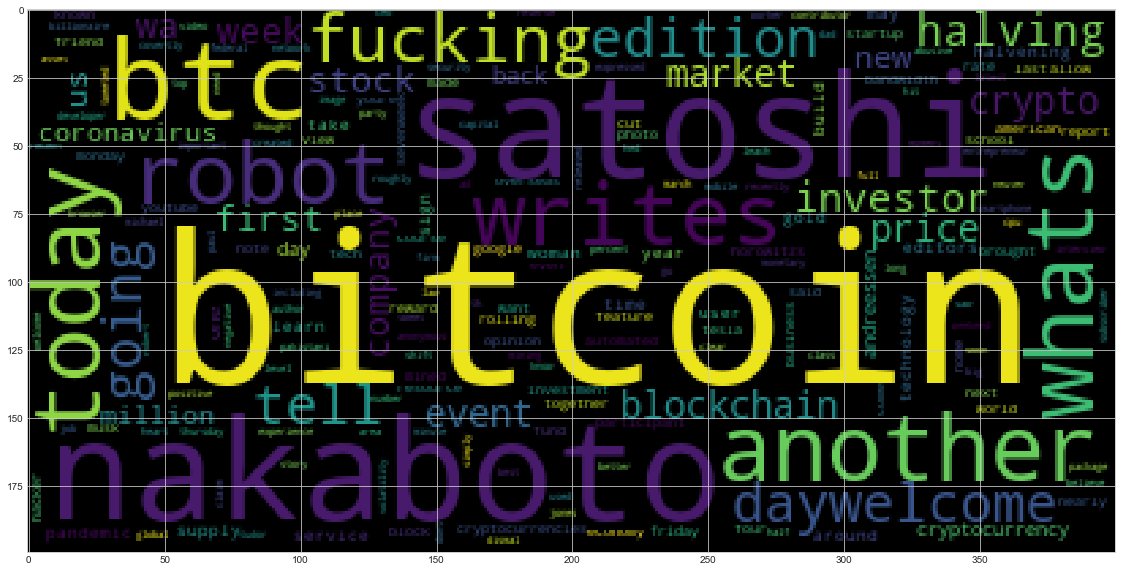

In [49]:
wc = WordCloud(collocations=False).generate(bitcoin_words)
fig = plt.figure()
plt.imshow(wc)
plt.show()

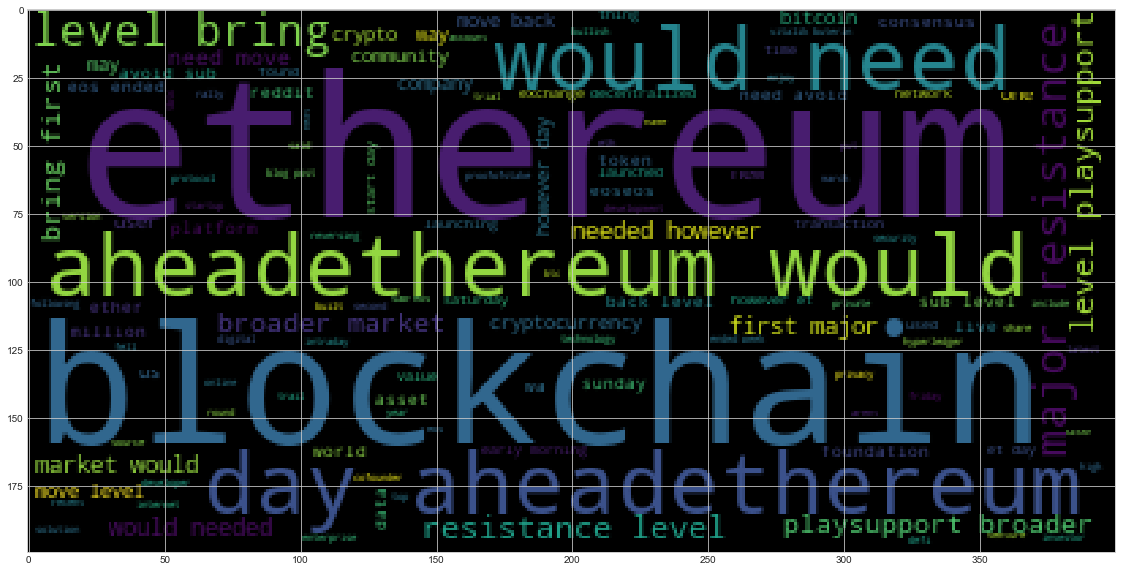

In [50]:
# Generate the Ethereum word cloud
fig = plt.figure()
wc = WordCloud().generate(eth_words)
plt.imshow(wc)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [51]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [52]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [54]:
# Concatenate all of the bitcoin text together
bitcoin_sent = []
for sent in btc_tokens['text']:
    sent_list = sent
    bitcoin_sent.append(sent_list)
    
big_string_bitcoin = ' '.join(bitcoin_sent)

In [55]:
bitcoin_doc = nlp(big_string_bitcoin)
bitcoin_doc.user_data['title'] = 'Bitcoin Name Entity Recognition'
displacy.render(bitcoin_doc, style='ent')

In [31]:
# Run the NER processor on all of the text

# Add a title to the document

In [32]:
# Render the visualization

In [57]:
# List all Entities
for ent in bitcoin_doc.ents:
    print (ent, ent.label_)

J.K. Rowling PERSON
Bitcoin GPE
The Cuckoos Calling WORK_OF_ART
Friday DATE
Yesterday DATE
Michael Terpin PERSON
SIM ORG
2018 DATE
Early next week DATE
Bitcoin GPE
third ORDINAL
the last few weeks DATE
blockchain GPE
new bitcoin LOC
first ORDINAL
Bitcoin GPE
2009 DATE
three CARDINAL
210,000 CARDINAL
every four years DATE
Bitcoin GPE
$13 billion MONEY
the past day DATE
bitcoin GPE
more than 6% PERCENT
Thursday DATE
Bitcoin GPE
more than 100% PERCENT
March 16 DATE
Reuters
 ORG
Goldman Sachs ORG
five CARDINAL
bitcoin GPE
Wednesday DATE
Goldman ORG
Michael Novogratz PERSON
Monday DATE
bitcoin GPE
$10,000 resistance MONEY
Novogratz PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
bitcoin GPE
2012 DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
2020 DATE
a big year DATE
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakab

---

## Ethereum NER

In [59]:
# Concatenate all of the bitcoin text together
eth_sent = []
for sent in eth_tokens['text']:
    sent_list_eth = sent
    eth_sent.append(sent_list_eth)
    
big_string_eth = " ".join(eth_sent)

In [60]:
eth_doc = nlp(big_string_eth)
eth_doc.user_data['title'] = 'Ethereum Named Entity Recogition'
displacy.render(eth_doc, style='ent')

In [61]:
# List all Entities
for ent in eth_doc.ents:
    print (ent, ent.label_)

Andreessen ORG
Crypto Startup School ORG
45 CARDINAL
U.S. GPE
seven-week DATE
Andreessen Ho PERSON
Ether PERSON
The Linux Foundation ORG
Drupal Foundation ORG
OSI ORG
millions CARDINAL
Americans NORP
$2 trillion dollar MONEY
Relief ORG
Ec ORG
the last few weeks DATE
blockchain GPE
new bitcoin LOC
crypto NORP
Dapper ORG
Libra GPE
March DATE
1500 CARDINAL
well over a hundred CARDINAL
the Mozilla Builders Incubator ORG
$13 billion MONEY
the past day DATE
bitcoin GPE
more than 6% PERCENT
Thursday DATE
Bitcoin GPE
more than 100% PERCENT
March 16 DATE
Blockchain GPE
first ORDINAL
blockchain GPE
2020 DATE
a big year DATE
Bitcoin GPE
today DATE
27 CARDINAL
Java PERSON
Federal Reserve Board ORG
Jerome H. Powell PERSON
May 28, 2020 DATE
one CARDINAL
Japanese NORP
Tuesday DATE
Phoenix GPE
Sunday night TIME
10,500,839 CARDINAL
May 31 DATE
CoinDesk ORG
Nolan Baurle PERSON
the Ethereum Foundation's ORG
Hudson Jameson PERSON
Lockdown Ed PERSON
Bitcoin PERSON
Ether PERSON
DeFi PERSON
Canadian NORP
SIM

In [36]:
# Render the visualization

In [62]:
# List all Entities
for ent in eth_doc.ents:
    print (ent, ent.label_)

Andreessen ORG
Crypto Startup School ORG
45 CARDINAL
U.S. GPE
seven-week DATE
Andreessen Ho PERSON
Ether PERSON
The Linux Foundation ORG
Drupal Foundation ORG
OSI ORG
millions CARDINAL
Americans NORP
$2 trillion dollar MONEY
Relief ORG
Ec ORG
the last few weeks DATE
blockchain GPE
new bitcoin LOC
crypto NORP
Dapper ORG
Libra GPE
March DATE
1500 CARDINAL
well over a hundred CARDINAL
the Mozilla Builders Incubator ORG
$13 billion MONEY
the past day DATE
bitcoin GPE
more than 6% PERCENT
Thursday DATE
Bitcoin GPE
more than 100% PERCENT
March 16 DATE
Blockchain GPE
first ORDINAL
blockchain GPE
2020 DATE
a big year DATE
Bitcoin GPE
today DATE
27 CARDINAL
Java PERSON
Federal Reserve Board ORG
Jerome H. Powell PERSON
May 28, 2020 DATE
one CARDINAL
Japanese NORP
Tuesday DATE
Phoenix GPE
Sunday night TIME
10,500,839 CARDINAL
May 31 DATE
CoinDesk ORG
Nolan Baurle PERSON
the Ethereum Foundation's ORG
Hudson Jameson PERSON
Lockdown Ed PERSON
Bitcoin PERSON
Ether PERSON
DeFi PERSON
Canadian NORP
SIM